In [ ]:
!pip install roboflow --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 127.1 MB/s eta 0:00:00


In [ ]:
os.listdir()

['.config',
 'Palcode-Test-1',
 'Palcode-Test-2',
 'yolov8n.pt',
 'yolo11n.pt',
 'runs',
 'sample_data']

#Download Labelled Data

In [ ]:
import roboflow

roboflow.login()

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········


In [ ]:
rf = roboflow.Roboflow()

project = rf.workspace("manojdev").project("palcode-test")
dataset = project.version(1).download("yolov8-obb")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Palcode-Test-1 in yolov8-obb:: 100%|██████████| 49/49 [00:00<00:00, 5955.57it/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dataset.location

'/content/Palcode-Test-2'

#Import Data

In [ ]:
import yaml

with open('/content/drive/MyDrive/Palcode/Palcode-Test-1/data.yaml', 'r') as f:
    data = yaml.safe_load(f)
data['train'] = '../train/images'
data['val'] = '../valid/images'

In [ ]:
data

{'train': '../train/images',
 'val': '../valid/images',
 'test': 'test/images',
 'names': {0: 'Door', 1: 'Window'}}

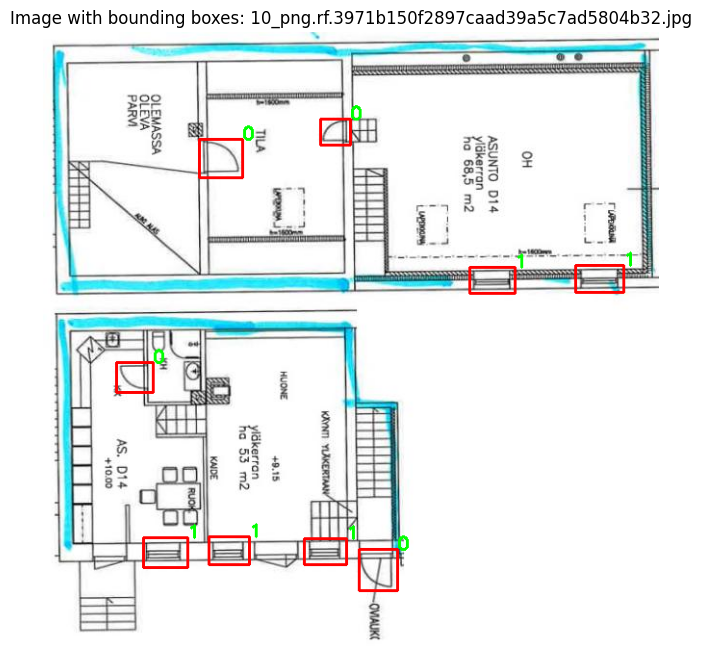

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load one image from train folder
train_img_dir = '/content/drive/MyDrive/Palcode/Palcode-Test-1/train/images'
train_lbl_dir = '/content/drive/MyDrive/Palcode/Palcode-Test-1/train/labels'  # usually labels are in similar structure

# Get list of images
image_files = [f for f in os.listdir(train_img_dir) if f.endswith(('.jpg', '.png'))]
if not image_files:
    print("No images found.")
else:
    img_file = image_files[0]
    img_path = os.path.join(train_img_dir, img_file)
    lbl_path = os.path.join(train_lbl_dir, os.path.splitext(img_file)[0] + '.txt')

    # Load image
    img = cv2.imread(img_path)
    # Check if image was loaded successfully
    if img is None:
        print(f"Error loading image: {img_path}")
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w, _ = img.shape

        # Draw OBB labels if available
        if os.path.exists(lbl_path):
            with open(lbl_path, 'r') as f:
                for line in f:
                    # Assuming OBB format is class_id x1 y1 x2 y2 x3 y3 x4 y4 (8 values + class_id = 9 total)
                    values = list(map(float, line.strip().split()))
                    if len(values) == 9:
                        cls = int(values[0])
                        # The corner coordinates are normalized, so scale them by image dimensions
                        corners_normalized = values[1:]
                        corners = [(int(corners_normalized[i] * w), int(corners_normalized[i+1] * h)) for i in range(0, len(corners_normalized), 2)]

                        # Convert corner points to numpy array for polylines
                        corners_np = np.array(corners, np.int32)
                        corners_np = corners_np.reshape((-1, 1, 2))

                        # Draw the oriented bounding box using polylines
                        cv2.polylines(img, [corners_np], isClosed=True, color=(255, 0, 0), thickness=2)
                        # Add class label near one of the corners
                        cv2.putText(img, str(int(cls)), corners[0], cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
                    else:
                        print(f"Skipping line with incorrect number of values in {lbl_path}: {line.strip()}")
        else:
            print(f"Label file not found for {img_file}")

        # Show the image
        plt.figure(figsize=(10, 8))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Image with bounding boxes: {img_file}")
        plt.show()

#Model

In [ ]:
!pip install ultralytics --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.2 MB/s eta 0:00:00


##Yolo8n

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.yaml')

In [ ]:
results = model.train(data=f"/content/Palcode-Test-1/data.yaml",
                     epochs=200,
                     imgsz=640,
                     batch=2,
                     lr0=0.001,
                     optimizer='Adam',
                     patience=50,
                     verbose=True
                      )

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=2, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Palcode-Test-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=Adam, overlap_mask=True, patience=50, perspective=0.0, plots=True, pose=12.0, pr

train: Scanning /content/Palcode-Test-1/train/labels... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<00:00, 1480.55it/s]

train: New cache created: /content/Palcode-Test-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 420.4±93.2 MB/s, size: 56.8 KB)


val: Scanning /content/Palcode-Test-1/valid/labels... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 434.70it/s]

val: New cache created: /content/Palcode-Test-1/valid/labels.cache


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200     0.867G      6.212      5.344      4.255         59        640: 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]

                   all          4         47          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200     0.867G      6.057      4.425      3.964         81        640: 100%|██████████| 8/8 [00:01<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.37it/s]

                   all          4         47          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200     0.889G      5.797       4.16      3.788         42        640: 100%|██████████| 8/8 [00:01<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.57it/s]

                   all          4         47          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200     0.889G      5.723      4.041      3.692         37        640: 100%|██████████| 8/8 [00:01<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.16it/s]

                   all          4         47          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200     0.889G      5.432      3.966      3.658         29        640: 100%|██████████| 8/8 [00:01<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.76it/s]

                   all          4         47          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200     0.889G      5.848      3.988      3.566         53        640: 100%|██████████| 8/8 [00:01<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.74it/s]

                   all          4         47          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200     0.889G      5.672      3.895      3.547         98        640: 100%|██████████| 8/8 [00:01<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.23it/s]

                   all          4         47          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200     0.889G      5.216       3.78      3.505         63        640: 100%|██████████| 8/8 [00:01<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.78it/s]

                   all          4         47          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200     0.889G      5.482      3.913      3.518         77        640: 100%|██████████| 8/8 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.98it/s]

                   all          4         47          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200     0.889G      5.138      3.855      3.588        115        640: 100%|██████████| 8/8 [00:00<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.62it/s]

                   all          4         47   0.000456     0.0161   0.000247    7.4e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200     0.889G      4.911      3.775      3.526         26        640: 100%|██████████| 8/8 [00:01<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.49it/s]

                   all          4         47   0.000456     0.0161   0.000247    7.4e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200     0.889G      4.941      3.703      3.525         32        640: 100%|██████████| 8/8 [00:00<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.47it/s]

                   all          4         47   0.000456     0.0161   0.000247    7.4e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200     0.889G      5.294      3.748      3.492         52        640: 100%|██████████| 8/8 [00:01<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.89it/s]

                   all          4         47   0.000456     0.0161   0.000247    7.4e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200     0.889G      5.266      3.717      3.465        102        640: 100%|██████████| 8/8 [00:01<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.43it/s]

                   all          4         47    0.00136     0.0484   0.000973   0.000264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200     0.889G      5.309      3.613       3.35         54        640: 100%|██████████| 8/8 [00:01<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.12it/s]

                   all          4         47    0.00136     0.0484   0.000973   0.000264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200     0.889G      4.761      3.722      3.554         82        640: 100%|██████████| 8/8 [00:01<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.44it/s]

                   all          4         47    0.00136     0.0484   0.000973   0.000264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200     0.889G      4.999      3.714      3.494         32        640: 100%|██████████| 8/8 [00:01<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.03it/s]

                   all          4         47    0.00136     0.0484   0.000973   0.000264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200     0.889G      4.899      3.669      3.439         38        640: 100%|██████████| 8/8 [00:01<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.26it/s]

                   all          4         47    0.00134     0.0484   0.000887   0.000302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200     0.889G      5.102      3.597      3.323         23        640: 100%|██████████| 8/8 [00:01<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.26it/s]

                   all          4         47    0.00134     0.0484   0.000887   0.000302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200     0.889G      4.889      3.611       3.39         48        640: 100%|██████████| 8/8 [00:01<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.12it/s]

                   all          4         47    0.00134     0.0484   0.000887   0.000302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200     0.889G      4.955      3.697      3.443         66        640: 100%|██████████| 8/8 [00:00<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.82it/s]

                   all          4         47    0.00134     0.0484   0.000887   0.000302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200     0.889G      4.975      3.631      3.333         69        640: 100%|██████████| 8/8 [00:01<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.10it/s]

                   all          4         47    0.00342      0.129     0.0023   0.000517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200     0.889G      4.868      3.508      3.349         92        640: 100%|██████████| 8/8 [00:01<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.64it/s]

                   all          4         47    0.00342      0.129     0.0023   0.000517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200     0.889G      5.081      3.509      3.239         42        640: 100%|██████████| 8/8 [00:01<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.62it/s]

                   all          4         47    0.00342      0.129     0.0023   0.000517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200     0.891G      4.787      3.449      3.297         37        640: 100%|██████████| 8/8 [00:01<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.83it/s]

                   all          4         47    0.00342      0.129     0.0023   0.000517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200     0.912G      4.669      3.516      3.407         34        640: 100%|██████████| 8/8 [00:01<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.33it/s]

                   all          4         47    0.00454      0.145     0.0098     0.0023



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200     0.924G      5.339      3.542       3.17         46        640: 100%|██████████| 8/8 [00:01<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.93it/s]

                   all          4         47    0.00454      0.145     0.0098     0.0023



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200     0.941G      4.734      3.455      3.272         34        640: 100%|██████████| 8/8 [00:01<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.69it/s]

                   all          4         47    0.00454      0.145     0.0098     0.0023



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200     0.963G      4.743      3.511      3.354         26        640: 100%|██████████| 8/8 [00:01<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.89it/s]

                   all          4         47    0.00454      0.145     0.0098     0.0023



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200     0.979G      4.868      3.517      3.227         21        640: 100%|██████████| 8/8 [00:01<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.35it/s]

                   all          4         47    0.00717      0.176     0.0068    0.00202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200     0.998G      4.559       3.43       3.29         32        640: 100%|██████████| 8/8 [00:01<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.07it/s]

                   all          4         47    0.00717      0.176     0.0068    0.00202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      1.01G      4.689      3.437      3.215         28        640: 100%|██████████| 8/8 [00:01<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all          4         47    0.00717      0.176     0.0068    0.00202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      1.03G      4.557      3.418      3.251         53        640: 100%|██████████| 8/8 [00:01<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.76it/s]

                   all          4         47    0.00717      0.176     0.0068    0.00202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      1.04G      5.057      3.479      3.125         27        640: 100%|██████████| 8/8 [00:01<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.31it/s]

                   all          4         47    0.00454      0.129    0.00593    0.00147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      1.06G      4.538      3.437      3.243         59        640: 100%|██████████| 8/8 [00:01<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.50it/s]

                   all          4         47    0.00454      0.129    0.00593    0.00147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      1.08G      4.446      3.387       3.27         37        640: 100%|██████████| 8/8 [00:01<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.60it/s]

                   all          4         47    0.00454      0.129    0.00593    0.00147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200       1.1G      4.451      3.348      3.198         73        640: 100%|██████████| 8/8 [00:01<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.30it/s]

                   all          4         47    0.00454      0.129    0.00593    0.00147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      1.12G      4.586      3.393      3.218         50        640: 100%|██████████| 8/8 [00:01<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.82it/s]

                   all          4         47    0.00651      0.194    0.00736    0.00137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      1.13G      4.412      3.256      3.182        101        640: 100%|██████████| 8/8 [00:01<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.53it/s]

                   all          4         47    0.00651      0.194    0.00736    0.00137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      1.15G       4.54      3.384       3.22         49        640: 100%|██████████| 8/8 [00:01<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.17it/s]

                   all          4         47    0.00651      0.194    0.00736    0.00137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      1.16G      4.804      3.318      3.086         65        640: 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.98it/s]

                   all          4         47    0.00651      0.194    0.00736    0.00137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      1.18G      4.412      3.383      3.147         39        640: 100%|██████████| 8/8 [00:01<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.74it/s]

                   all          4         47    0.00471      0.161    0.00395   0.000879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200       1.2G      4.293      3.418      3.233         93        640: 100%|██████████| 8/8 [00:01<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.33it/s]

                   all          4         47    0.00471      0.161    0.00395   0.000879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      1.22G       4.43      3.408       3.19         42        640: 100%|██████████| 8/8 [00:01<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.40it/s]

                   all          4         47    0.00471      0.161    0.00395   0.000879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      1.24G      4.384      3.448       3.31         72        640: 100%|██████████| 8/8 [00:01<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.41it/s]

                   all          4         47    0.00471      0.161    0.00395   0.000879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      1.25G      4.729      3.327        3.1         27        640: 100%|██████████| 8/8 [00:01<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.10it/s]

                   all          4         47    0.00316      0.113    0.00203   0.000611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      1.27G      4.267      3.168      3.084         57        640: 100%|██████████| 8/8 [00:01<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.24it/s]

                   all          4         47    0.00316      0.113    0.00203   0.000611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      1.28G      4.662      3.355      2.893         81        640: 100%|██████████| 8/8 [00:01<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.81it/s]

                   all          4         47    0.00316      0.113    0.00203   0.000611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200       1.3G      4.508      3.278      3.095         80        640: 100%|██████████| 8/8 [00:01<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]

                   all          4         47    0.00316      0.113    0.00203   0.000611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      1.32G      4.307      3.247      3.117         49        640: 100%|██████████| 8/8 [00:01<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.61it/s]

                   all          4         47    0.00929      0.193    0.00565    0.00117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      1.34G      4.217      3.196      3.138         95        640: 100%|██████████| 8/8 [00:01<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.91it/s]

                   all          4         47    0.00929      0.193    0.00565    0.00117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      1.35G      4.293      3.275      3.012         60        640: 100%|██████████| 8/8 [00:00<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.78it/s]

                   all          4         47    0.00929      0.193    0.00565    0.00117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      1.37G      4.043      3.334       3.24         70        640: 100%|██████████| 8/8 [00:01<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.14it/s]

                   all          4         47    0.00929      0.193    0.00565    0.00117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      1.39G      4.368      3.247      3.036         47        640: 100%|██████████| 8/8 [00:01<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.82it/s]

                   all          4         47    0.00782      0.176    0.00485    0.00127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      1.41G      4.205      3.313      3.084         62        640: 100%|██████████| 8/8 [00:01<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.83it/s]

                   all          4         47    0.00782      0.176    0.00485    0.00127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      1.42G      4.295      3.271      2.983         38        640: 100%|██████████| 8/8 [00:01<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.67it/s]

                   all          4         47    0.00782      0.176    0.00485    0.00127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      1.44G      4.435      3.257      3.009         45        640: 100%|██████████| 8/8 [00:01<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.32it/s]

                   all          4         47    0.00782      0.176    0.00485    0.00127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      1.46G      4.481      3.274      2.939         95        640: 100%|██████████| 8/8 [00:01<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.29it/s]

                   all          4         47    0.00831      0.159     0.0054    0.00126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/8 [00:00<?, ?it/s]


KeyboardInterrupt: 

##Yolo8n.pt

In [ ]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 60.2MB/s]


In [ ]:
results = model.train(
    data="/content/Palcode-Test-1/data.yaml",  # your data.yaml
    epochs=100,
    imgsz=640,
    batch=2,
    lr0=0.001,
    optimizer="Adam",
    patience=30,
    verbose=True
)

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=2, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Palcode-Test-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=Adam, overlap_mask=True, patience=30, perspective=0.0, plots=True, pose=12.0, pret

train: Scanning /content/Palcode-Test-1/train/labels.cache... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 354.3±81.8 MB/s, size: 56.8 KB)


val: Scanning /content/Palcode-Test-1/valid/labels.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train5
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.01G      2.023       1.88      1.271         59        640: 100%|██████████| 8/8 [00:01<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all          4         47      0.625      0.288      0.392      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.01G      1.683       1.47      1.204         81        640: 100%|██████████| 8/8 [00:01<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.13it/s]

                   all          4         47      0.611      0.288      0.373      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.01G      1.595      1.533      1.167         42        640: 100%|██████████| 8/8 [00:01<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all          4         47      0.634      0.288      0.386      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.01G      1.595      1.529      1.147         37        640: 100%|██████████| 8/8 [00:01<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.27it/s]

                   all          4         47       0.68       0.45       0.52      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.01G      1.683      1.472      1.179         29        640: 100%|██████████| 8/8 [00:01<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]

                   all          4         47      0.948      0.495      0.619      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.01G      2.019      1.732      1.226         53        640: 100%|██████████| 8/8 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.37it/s]

                   all          4         47      0.948      0.495      0.619      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.01G      1.658      1.489      1.131         98        640: 100%|██████████| 8/8 [00:01<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.98it/s]


                   all          4         47      0.588      0.558      0.637       0.36

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.01G      1.532      1.446      1.131         63        640: 100%|██████████| 8/8 [00:01<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.94it/s]

                   all          4         47      0.588      0.558      0.637       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.01G      1.726       1.55      1.154         77        640: 100%|██████████| 8/8 [00:01<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.87it/s]

                   all          4         47      0.588      0.558      0.637       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.01G      1.728      1.584      1.233        115        640: 100%|██████████| 8/8 [00:00<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.57it/s]

                   all          4         47      0.574      0.686      0.635       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.01G      1.436      1.431       1.16         26        640: 100%|██████████| 8/8 [00:01<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.04it/s]

                   all          4         47      0.574      0.686      0.635       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.01G      1.438      1.397      1.133         32        640: 100%|██████████| 8/8 [00:01<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.65it/s]

                   all          4         47      0.574      0.686      0.635       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.01G      1.425       1.41      1.119         52        640: 100%|██████████| 8/8 [00:01<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.74it/s]

                   all          4         47      0.574      0.686      0.635       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.01G      1.548      1.385      1.142        102        640: 100%|██████████| 8/8 [00:01<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.87it/s]


                   all          4         47      0.633      0.619      0.579      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.01G      1.586      1.427      1.136         54        640: 100%|██████████| 8/8 [00:01<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]


                   all          4         47      0.633      0.619      0.579      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.01G      1.524      1.401       1.13         82        640: 100%|██████████| 8/8 [00:01<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.08it/s]

                   all          4         47      0.633      0.619      0.579      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.01G      1.523       1.54      1.197         32        640: 100%|██████████| 8/8 [00:01<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.20it/s]

                   all          4         47      0.633      0.619      0.579      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.01G      1.538      1.427      1.109         38        640: 100%|██████████| 8/8 [00:00<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.00it/s]

                   all          4         47       0.61      0.624       0.66      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.01G      1.517      1.414      1.135         23        640: 100%|██████████| 8/8 [00:01<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.90it/s]

                   all          4         47       0.61      0.624       0.66      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.01G      1.445      1.322      1.148         48        640: 100%|██████████| 8/8 [00:01<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.51it/s]

                   all          4         47       0.61      0.624       0.66      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.01G      1.607      1.508      1.147         66        640: 100%|██████████| 8/8 [00:00<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.01it/s]

                   all          4         47       0.61      0.624       0.66      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.01G      1.475      1.322      1.119         69        640: 100%|██████████| 8/8 [00:01<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all          4         47      0.634      0.641      0.675      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.01G      1.477       1.31      1.085         92        640: 100%|██████████| 8/8 [00:01<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.18it/s]

                   all          4         47      0.634      0.641      0.675      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.01G       1.51      1.325      1.095         42        640: 100%|██████████| 8/8 [00:01<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.32it/s]

                   all          4         47      0.634      0.641      0.675      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.01G      1.425      1.283      1.095         37        640: 100%|██████████| 8/8 [00:01<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.43it/s]

                   all          4         47      0.634      0.641      0.675      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.01G      1.587      1.467      1.161         34        640: 100%|██████████| 8/8 [00:01<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.10it/s]

                   all          4         47      0.737      0.543      0.655      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.01G      1.685      1.424      1.128         46        640: 100%|██████████| 8/8 [00:01<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.50it/s]

                   all          4         47      0.737      0.543      0.655      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.01G      1.392      1.233      1.067         34        640: 100%|██████████| 8/8 [00:01<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.58it/s]

                   all          4         47      0.737      0.543      0.655      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.01G      1.446      1.285      1.122         26        640: 100%|██████████| 8/8 [00:01<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.59it/s]

                   all          4         47      0.737      0.543      0.655      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.01G      1.503      1.407      1.134         21        640: 100%|██████████| 8/8 [00:01<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.19it/s]

                   all          4         47       0.74      0.539      0.672      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.01G      1.345      1.259      1.103         32        640: 100%|██████████| 8/8 [00:01<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.93it/s]

                   all          4         47       0.74      0.539      0.672      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.01G      1.586      1.541      1.151         28        640: 100%|██████████| 8/8 [00:01<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.15it/s]

                   all          4         47       0.74      0.539      0.672      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.01G      1.428       1.27      1.074         53        640: 100%|██████████| 8/8 [00:01<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.44it/s]

                   all          4         47       0.74      0.539      0.672      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.01G      1.479      1.374      1.083         27        640: 100%|██████████| 8/8 [00:01<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.25it/s]

                   all          4         47      0.628      0.695      0.715      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.01G      1.501      1.393      1.155         59        640: 100%|██████████| 8/8 [00:01<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.33it/s]

                   all          4         47      0.628      0.695      0.715      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.01G      1.345      1.212      1.071         37        640: 100%|██████████| 8/8 [00:01<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.19it/s]

                   all          4         47      0.628      0.695      0.715      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.01G      1.366      1.328      1.091         73        640: 100%|██████████| 8/8 [00:01<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.38it/s]

                   all          4         47      0.628      0.695      0.715      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.01G      1.407      1.284      1.102         50        640: 100%|██████████| 8/8 [00:01<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.89it/s]

                   all          4         47      0.669      0.701      0.708      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.01G       1.44      1.198      1.069        101        640: 100%|██████████| 8/8 [00:01<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.14it/s]

                   all          4         47      0.669      0.701      0.708      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.01G       1.42      1.319      1.135         49        640: 100%|██████████| 8/8 [00:01<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.85it/s]

                   all          4         47      0.669      0.701      0.708      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.01G       1.57      1.278      1.078         65        640: 100%|██████████| 8/8 [00:01<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.88it/s]

                   all          4         47      0.669      0.701      0.708      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.01G       1.42      1.335      1.114         39        640: 100%|██████████| 8/8 [00:00<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.89it/s]

                   all          4         47      0.623      0.719      0.722      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.01G      1.457      1.335      1.088         93        640: 100%|██████████| 8/8 [00:01<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.14it/s]

                   all          4         47      0.623      0.719      0.722      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.01G      1.403      1.288      1.109         42        640: 100%|██████████| 8/8 [00:01<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.57it/s]

                   all          4         47      0.623      0.719      0.722      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.01G      1.591      1.568      1.215         72        640: 100%|██████████| 8/8 [00:00<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.31it/s]

                   all          4         47      0.623      0.719      0.722      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.01G      1.513      1.284      1.072         27        640: 100%|██████████| 8/8 [00:01<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.64it/s]

                   all          4         47      0.664      0.667      0.712      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.01G      1.349      1.119      1.064         57        640: 100%|██████████| 8/8 [00:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.34it/s]

                   all          4         47      0.664      0.667      0.712      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.01G      1.563      1.278      1.101         81        640: 100%|██████████| 8/8 [00:01<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.73it/s]

                   all          4         47      0.664      0.667      0.712      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.01G      1.507      1.317      1.087         80        640: 100%|██████████| 8/8 [00:01<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.69it/s]

                   all          4         47      0.664      0.667      0.712      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.01G       1.38      1.222      1.063         49        640: 100%|██████████| 8/8 [00:01<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.12it/s]

                   all          4         47      0.592      0.828      0.718      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.01G      1.374      1.241      1.085         95        640: 100%|██████████| 8/8 [00:01<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.64it/s]

                   all          4         47      0.592      0.828      0.718      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.01G      1.433      1.334      1.093         60        640: 100%|██████████| 8/8 [00:00<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.35it/s]

                   all          4         47      0.592      0.828      0.718      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.01G      1.301      1.278      1.094         70        640: 100%|██████████| 8/8 [00:01<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.89it/s]

                   all          4         47      0.592      0.828      0.718      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.01G      1.459      1.256      1.097         47        640: 100%|██████████| 8/8 [00:01<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.05it/s]

                   all          4         47      0.645      0.857      0.739      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.01G      1.332      1.266      1.077         62        640: 100%|██████████| 8/8 [00:01<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]

                   all          4         47      0.645      0.857      0.739      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.01G      1.351      1.126      1.054         38        640: 100%|██████████| 8/8 [00:01<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all          4         47      0.645      0.857      0.739      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.01G      1.499       1.24      1.102         45        640: 100%|██████████| 8/8 [00:01<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.85it/s]

                   all          4         47      0.645      0.857      0.739      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.01G      1.482      1.214      1.053         95        640: 100%|██████████| 8/8 [00:01<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.01it/s]

                   all          4         47      0.722      0.818      0.737      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.01G      1.461      1.171      1.043         38        640: 100%|██████████| 8/8 [00:01<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.64it/s]

                   all          4         47      0.722      0.818      0.737      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.01G      1.315      1.071      1.034         66        640: 100%|██████████| 8/8 [00:01<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.18it/s]

                   all          4         47      0.722      0.818      0.737      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.01G      1.333      1.189      1.085         57        640: 100%|██████████| 8/8 [00:01<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.88it/s]

                   all          4         47      0.722      0.818      0.737      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.01G      1.383      1.219      1.063         50        640: 100%|██████████| 8/8 [00:01<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.62it/s]

                   all          4         47      0.709      0.829      0.743      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.01G      1.431      1.193      1.043         80        640: 100%|██████████| 8/8 [00:01<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]

                   all          4         47      0.709      0.829      0.743      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.01G      1.462      1.315      1.064         21        640: 100%|██████████| 8/8 [00:01<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.35it/s]

                   all          4         47      0.709      0.829      0.743      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.01G      1.412      1.274      1.095         34        640: 100%|██████████| 8/8 [00:01<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.39it/s]

                   all          4         47      0.709      0.829      0.743      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.01G      1.359      1.238       1.07         33        640: 100%|██████████| 8/8 [00:01<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.69it/s]

                   all          4         47      0.756      0.793      0.762      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.01G      1.365       1.14      1.076         75        640: 100%|██████████| 8/8 [00:01<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.27it/s]

                   all          4         47      0.756      0.793      0.762      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.01G      1.356      1.157      1.013         40        640: 100%|██████████| 8/8 [00:01<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.98it/s]

                   all          4         47      0.756      0.793      0.762      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.01G      1.309      1.077       1.01         58        640: 100%|██████████| 8/8 [00:01<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.96it/s]

                   all          4         47      0.756      0.793      0.762      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.01G      1.422      1.215      1.078         25        640: 100%|██████████| 8/8 [00:01<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.09it/s]

                   all          4         47      0.719      0.779      0.747      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.01G      1.249      1.076      1.054         66        640: 100%|██████████| 8/8 [00:01<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.59it/s]

                   all          4         47      0.719      0.779      0.747      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.01G      1.397      1.242      1.066         82        640: 100%|██████████| 8/8 [00:01<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.50it/s]

                   all          4         47      0.719      0.779      0.747      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.01G      1.357      1.185      1.046         77        640: 100%|██████████| 8/8 [00:01<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.00it/s]

                   all          4         47      0.719      0.779      0.747      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.01G      1.245      1.019      1.023         31        640: 100%|██████████| 8/8 [00:01<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.73it/s]

                   all          4         47      0.741      0.758      0.764      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.01G      1.534      1.281      1.083         66        640: 100%|██████████| 8/8 [00:01<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.12it/s]

                   all          4         47      0.741      0.758      0.764      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.01G      1.183      1.044      1.017         41        640: 100%|██████████| 8/8 [00:01<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.79it/s]

                   all          4         47      0.741      0.758      0.764      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.01G      1.305      1.078       1.03         39        640: 100%|██████████| 8/8 [00:01<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.44it/s]

                   all          4         47      0.741      0.758      0.764      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.01G      1.477      1.207      1.058         48        640: 100%|██████████| 8/8 [00:01<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.77it/s]

                   all          4         47      0.777      0.757      0.766       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.01G       1.33       1.19      1.015         18        640: 100%|██████████| 8/8 [00:01<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.51it/s]

                   all          4         47      0.777      0.757      0.766       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.01G       1.28      1.115      1.029         86        640: 100%|██████████| 8/8 [00:01<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.94it/s]

                   all          4         47      0.777      0.757      0.766       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.01G      1.411       1.21      1.052         23        640: 100%|██████████| 8/8 [00:01<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.19it/s]

                   all          4         47      0.777      0.757      0.766       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.01G      1.277      1.165      1.044         18        640: 100%|██████████| 8/8 [00:01<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]

                   all          4         47      0.682      0.828      0.764      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.01G      1.453       1.18       1.05         70        640: 100%|██████████| 8/8 [00:01<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.41it/s]

                   all          4         47      0.682      0.828      0.764      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.01G      1.293      1.187      1.055         40        640: 100%|██████████| 8/8 [00:01<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.83it/s]

                   all          4         47      0.682      0.828      0.764      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.01G      1.185      1.017      1.018         31        640: 100%|██████████| 8/8 [00:01<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.39it/s]

                   all          4         47      0.682      0.828      0.764      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.01G      1.136      1.035      1.022         31        640: 100%|██████████| 8/8 [00:01<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.77it/s]


                   all          4         47      0.722      0.809      0.742      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.01G      1.275      1.073      1.037         37        640: 100%|██████████| 8/8 [00:01<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.60it/s]

                   all          4         47      0.722      0.809      0.742      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.01G      1.383      1.158      1.042         78        640: 100%|██████████| 8/8 [00:01<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.92it/s]

                   all          4         47      0.722      0.809      0.742      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.01G      1.318      1.144      1.057         63        640: 100%|██████████| 8/8 [00:01<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.58it/s]

                   all          4         47      0.722      0.809      0.742      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.01G       1.36      1.123      1.078         63        640: 100%|██████████| 8/8 [00:01<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.97it/s]

                   all          4         47      0.721      0.827      0.755       0.43


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.01G      1.225      1.149      1.024         27        640: 100%|██████████| 8/8 [00:00<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.89it/s]

                   all          4         47      0.721      0.827      0.755       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.01G      1.256      1.059     0.9998         24        640: 100%|██████████| 8/8 [00:00<00:00, 10.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.02it/s]

                   all          4         47      0.721      0.827      0.755       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.01G      1.343      1.295      1.051         50        640: 100%|██████████| 8/8 [00:00<00:00, 11.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.68it/s]

                   all          4         47      0.721      0.827      0.755       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.01G      1.186      1.088     0.9997         33        640: 100%|██████████| 8/8 [00:00<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.84it/s]

                   all          4         47      0.743       0.81      0.775      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.01G      1.408      1.242      1.054         23        640: 100%|██████████| 8/8 [00:00<00:00,  9.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.64it/s]

                   all          4         47      0.743       0.81      0.775      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.01G      1.216      1.139      1.026         42        640: 100%|██████████| 8/8 [00:00<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.24it/s]

                   all          4         47      0.743       0.81      0.775      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.01G      1.319      1.179      1.032         37        640: 100%|██████████| 8/8 [00:01<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.61it/s]

                   all          4         47      0.743       0.81      0.775      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.01G      1.256      1.095      1.021         44        640: 100%|██████████| 8/8 [00:00<00:00, 10.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.63it/s]

                   all          4         47      0.734      0.873      0.792      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.01G      1.243      1.182      1.027         38        640: 100%|██████████| 8/8 [00:00<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.56it/s]

                   all          4         47      0.734      0.873      0.792      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.01G      1.282      1.115      1.023         33        640: 100%|██████████| 8/8 [00:00<00:00, 11.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.04it/s]

                   all          4         47      0.734      0.873      0.792      0.435



100 epochs completed in 0.043 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 6.3MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.31it/s]


                   all          4         47      0.741      0.758      0.765       0.44
                  Door          4         31      0.965      0.892      0.953      0.638
                Window          4         16      0.517      0.625      0.577      0.242
Speed: 1.1ms preprocess, 5.3ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs/detect/train5


##Yolo11n

In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLO11n model
model = YOLO("yolo11n.yaml")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
results = model.train(data=f"/content/Palcode-Test-2/data.yaml",
                     epochs=100,
                     imgsz=1024,
                     batch=2,
                     #lr0=0.001,
                     #optimizer='Adam',
                     #warmup_epochs=3,
                     patience=30
                      )

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=2, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Palcode-Test-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1024, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=30, perspective=0.0, plots=True, pose=12.0, pr

100%|██████████| 755k/755k [00:00<00:00, 19.4MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

 22                  -1  1    378880  ultralytics.nn.modules.block.C3k2            [384, 256, 1, True]           
 23        [16, 19, 22]  1    431062  ultralytics.nn.modules.head.Detect           [2, [64, 128, 256]]           
YOLO11n summary: 181 layers, 2,590,230 parameters, 2,590,214 gradients, 6.4 GFLOPs

Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 89.3MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 33.1±3.7 MB/s, size: 101.9 KB)


train: Scanning /content/Palcode-Test-2/train/labels... 48 images, 0 backgrounds, 0 corrupt: 100%|██████████| 48/48 [00:00<00:00, 519.93it/s]

train: New cache created: /content/Palcode-Test-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 24.6±10.4 MB/s, size: 116.8 KB)


val: Scanning /content/Palcode-Test-2/valid/labels... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 334.34it/s]

val: New cache created: /content/Palcode-Test-2/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 1024 train, 1024 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      0.93G      4.947      4.536      4.211         34       1024: 100%|██████████| 24/24 [00:05<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.17s/it]

                   all          4         47          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.945G      4.757      4.403      4.175         28       1024: 100%|██████████| 24/24 [00:03<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.97it/s]

                   all          4         47          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.961G      4.848      4.427      4.151        105       1024: 100%|██████████| 24/24 [00:03<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.46it/s]

                   all          4         47          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.975G      4.461      4.382       4.09         30       1024: 100%|██████████| 24/24 [00:04<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.54it/s]

                   all          4         47          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      0.99G      4.617      4.373      4.026         43       1024: 100%|██████████| 24/24 [00:02<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.32it/s]

                   all          4         47          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.01G      4.282      4.366      3.998         24       1024: 100%|██████████| 24/24 [00:02<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.41it/s]

                   all          4         47   0.000852     0.0312   0.000604   6.04e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.02G      4.211      4.227      3.944         67       1024: 100%|██████████| 24/24 [00:03<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.24it/s]

                   all          4         47   0.000852     0.0312   0.000604   6.04e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.04G      4.245      4.126       3.81         40       1024: 100%|██████████| 24/24 [00:02<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.41it/s]

                   all          4         47      0.503     0.0938    0.00127   0.000418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.05G       4.04      4.177      3.771         30       1024: 100%|██████████| 24/24 [00:02<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all          4         47      0.502     0.0938   0.000965   0.000297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.06G      4.025      4.048       3.77         40       1024: 100%|██████████| 24/24 [00:04<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]

                   all          4         47    0.00124     0.0625   0.000585   0.000171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.08G      3.925      3.972      3.728         48       1024: 100%|██████████| 24/24 [00:02<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


                   all          4         47    0.00124     0.0625   0.000585   0.000171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.09G      3.927      3.892      3.619         32       1024: 100%|██████████| 24/24 [00:02<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all          4         47      0.508     0.0625    0.00396    0.00135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.29G      4.029      3.832      3.529         85       1024: 100%|██████████| 24/24 [00:03<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all          4         47    0.00474     0.0625    0.00118   0.000398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       1.4G      3.948      3.797      3.516         62       1024: 100%|██████████| 24/24 [00:03<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all          4         47    0.00706      0.142    0.00437   0.000631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.52G      3.532      3.837      3.596         80       1024: 100%|██████████| 24/24 [00:03<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]

                   all          4         47    0.00706      0.142    0.00437   0.000631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.54G      3.715      3.713      3.448         71       1024: 100%|██████████| 24/24 [00:02<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all          4         47    0.00972      0.113      0.006    0.00125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.55G      3.768      3.694      3.412         54       1024: 100%|██████████| 24/24 [00:04<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]

                   all          4         47      0.012       0.16    0.00983    0.00226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.57G      3.556      3.681      3.389         42       1024: 100%|██████████| 24/24 [00:02<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all          4         47      0.013      0.145     0.0111    0.00319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.58G      3.571      3.726      3.339         34       1024: 100%|██████████| 24/24 [00:02<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all          4         47      0.013      0.145     0.0111    0.00319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       1.6G        3.6      3.688      3.345         36       1024: 100%|██████████| 24/24 [00:03<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all          4         47     0.0131      0.145     0.0106    0.00282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.62G       3.64      3.757      3.394         87       1024: 100%|██████████| 24/24 [00:03<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


                   all          4         47      0.017      0.194     0.0173    0.00425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.63G        3.5      3.791      3.399         48       1024: 100%|██████████| 24/24 [00:02<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all          4         47     0.0215      0.303     0.0245    0.00842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.64G      3.631      3.601      3.299         64       1024: 100%|██████████| 24/24 [00:03<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]

                   all          4         47     0.0215      0.303     0.0245    0.00842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.66G      3.576      3.583       3.28         74       1024: 100%|██████████| 24/24 [00:03<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.37it/s]

                   all          4         47     0.0224       0.35     0.0238    0.00786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.67G      3.425      3.478      3.271         58       1024: 100%|██████████| 24/24 [00:02<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]

                   all          4         47     0.0218      0.271      0.021     0.0103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.69G      3.429      3.424      3.189         73       1024: 100%|██████████| 24/24 [00:02<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.95it/s]

                   all          4         47     0.0256      0.256     0.0253     0.0102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       1.7G      3.429       3.52      3.162         23       1024: 100%|██████████| 24/24 [00:03<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.29it/s]

                   all          4         47     0.0256      0.256     0.0253     0.0102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.71G      3.341      3.416      3.129         84       1024: 100%|██████████| 24/24 [00:02<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all          4         47     0.0397      0.144     0.0248    0.00851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.73G      3.332      3.448      3.142         26       1024: 100%|██████████| 24/24 [00:02<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

                   all          4         47     0.0407      0.159      0.025    0.00878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.75G      3.329      3.522      3.237        107       1024: 100%|██████████| 24/24 [00:03<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


                   all          4         47      0.031      0.288     0.0322     0.0128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.76G      3.498      3.526      3.181        118       1024: 100%|██████████| 24/24 [00:03<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.49it/s]

                   all          4         47      0.031      0.288     0.0322     0.0128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.78G      3.439      3.401      3.073        130       1024: 100%|██████████| 24/24 [00:02<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]

                   all          4         47     0.0221       0.24     0.0242    0.00967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.79G      3.428      3.309       3.01         75       1024: 100%|██████████| 24/24 [00:02<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.12it/s]

                   all          4         47     0.0442       0.21     0.0384     0.0156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       1.8G      3.438      3.256      2.962         75       1024: 100%|██████████| 24/24 [00:03<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all          4         47     0.0693      0.175     0.0332     0.0122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.82G      3.397      3.296      3.069        108       1024: 100%|██████████| 24/24 [00:02<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.84it/s]

                   all          4         47     0.0693      0.175     0.0332     0.0122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.83G      3.307      3.282      3.076         80       1024: 100%|██████████| 24/24 [00:02<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.85it/s]

                   all          4         47     0.0927      0.159      0.052     0.0226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.85G      3.224      3.333      3.046         45       1024: 100%|██████████| 24/24 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]

                   all          4         47      0.237      0.143      0.111     0.0389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.87G      3.401      3.324       3.01         63       1024: 100%|██████████| 24/24 [00:03<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.77it/s]

                   all          4         47      0.164      0.159      0.108     0.0312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.88G      3.163       3.36      3.062         51       1024: 100%|██████████| 24/24 [00:02<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.31it/s]

                   all          4         47      0.164      0.159      0.108     0.0312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       1.9G      3.286       3.44      3.048         72       1024: 100%|██████████| 24/24 [00:02<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.55it/s]

                   all          4         47      0.149       0.16     0.0839     0.0241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.91G      3.332      3.208      2.961         37       1024: 100%|██████████| 24/24 [00:04<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.82it/s]

                   all          4         47      0.149      0.113     0.0607     0.0195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.92G      3.327      3.242      2.939         65       1024: 100%|██████████| 24/24 [00:03<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.79it/s]

                   all          4         47      0.158      0.127     0.0692     0.0236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.94G      3.162      3.186      2.934         66       1024: 100%|██████████| 24/24 [00:02<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.09it/s]

                   all          4         47      0.158      0.127     0.0692     0.0236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.95G      3.111      3.255      2.992         51       1024: 100%|██████████| 24/24 [00:03<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]


                   all          4         47      0.156      0.129     0.0915     0.0347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.97G      3.194        3.2      2.944         50       1024: 100%|██████████| 24/24 [00:03<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]

                   all          4         47      0.164       0.16     0.0925     0.0334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.98G      3.191      3.176      2.916         78       1024: 100%|██████████| 24/24 [00:02<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.71it/s]

                   all          4         47      0.168       0.16     0.0945     0.0371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         2G      3.215      3.073       2.85         55       1024: 100%|██████████| 24/24 [00:02<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.35it/s]

                   all          4         47      0.168       0.16     0.0945     0.0371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.01G      3.091       3.26      2.951         21       1024: 100%|██████████| 24/24 [00:03<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.08it/s]

                   all          4         47      0.166       0.16     0.0815     0.0358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.03G      3.142      3.156      2.821         42       1024: 100%|██████████| 24/24 [00:02<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.33it/s]

                   all          4         47      0.239      0.158      0.135     0.0474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.04G      3.131      3.117      2.876         41       1024: 100%|██████████| 24/24 [00:02<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.57it/s]

                   all          4         47      0.221      0.144      0.121     0.0441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.06G      3.131      3.271      2.954         27       1024: 100%|██████████| 24/24 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.53it/s]

                   all          4         47      0.221      0.144      0.121     0.0441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.07G      3.042      3.109      2.789         25       1024: 100%|██████████| 24/24 [00:03<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.54it/s]

                   all          4         47      0.291      0.239       0.12      0.042



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.09G      3.075      3.108      2.829         38       1024: 100%|██████████| 24/24 [00:03<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.66it/s]

                   all          4         47      0.277      0.239      0.137     0.0474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       2.1G      3.117      3.097      2.725         61       1024: 100%|██████████| 24/24 [00:02<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.19it/s]

                   all          4         47      0.244      0.223      0.126     0.0534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.12G      3.172      3.076       2.71         96       1024: 100%|██████████| 24/24 [00:03<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.61it/s]

                   all          4         47      0.244      0.223      0.126     0.0534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.14G      3.149      3.244      2.906         74       1024: 100%|██████████| 24/24 [00:02<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.99it/s]

                   all          4         47      0.206      0.224      0.132     0.0429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.15G      3.069      3.053       2.83         62       1024: 100%|██████████| 24/24 [00:03<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all          4         47       0.21      0.175      0.118     0.0403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.16G      3.233      3.019      2.716        154       1024: 100%|██████████| 24/24 [00:03<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all          4         47      0.277      0.127      0.117     0.0388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.18G      3.003      2.964      2.774         44       1024: 100%|██████████| 24/24 [00:03<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all          4         47      0.277      0.127      0.117     0.0388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.19G      3.048       3.11      2.867         68       1024: 100%|██████████| 24/24 [00:02<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all          4         47      0.194      0.159      0.144      0.046



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.21G      3.057      3.066      2.778         20       1024: 100%|██████████| 24/24 [00:03<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all          4         47      0.254      0.208      0.169     0.0623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.22G      2.994      2.927       2.71         56       1024: 100%|██████████| 24/24 [00:03<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all          4         47      0.229      0.224      0.152     0.0638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.24G      2.992      3.172      2.878         21       1024: 100%|██████████| 24/24 [00:02<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.58it/s]

                   all          4         47      0.229      0.224      0.152     0.0638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.25G      2.904      2.998      2.763         56       1024: 100%|██████████| 24/24 [00:03<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.74it/s]

                   all          4         47      0.353      0.192      0.174     0.0743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.27G       2.97      2.994      2.718         46       1024: 100%|██████████| 24/24 [00:04<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.97it/s]

                   all          4         47      0.285      0.183      0.167     0.0749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.28G      2.966      2.928      2.716         23       1024: 100%|██████████| 24/24 [00:02<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.31it/s]

                   all          4         47      0.221       0.24      0.175     0.0789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.29G      3.007      3.072      2.823         54       1024: 100%|██████████| 24/24 [00:02<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.84it/s]

                   all          4         47      0.221       0.24      0.175     0.0789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.31G      3.127      2.985      2.637        105       1024: 100%|██████████| 24/24 [00:03<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]

                   all          4         47      0.287      0.268      0.185     0.0773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.33G      2.902      3.001      2.744         67       1024: 100%|██████████| 24/24 [00:03<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.74it/s]

                   all          4         47      0.216      0.196      0.178     0.0794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.34G      2.931      2.898      2.674         37       1024: 100%|██████████| 24/24 [00:03<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.19it/s]

                   all          4         47      0.219       0.21      0.175     0.0825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.36G      2.905      2.898      2.719         51       1024: 100%|██████████| 24/24 [00:02<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.35it/s]

                   all          4         47      0.219       0.21      0.175     0.0825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.38G      3.089      3.022      2.722         80       1024: 100%|██████████| 24/24 [00:03<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.40it/s]

                   all          4         47      0.232       0.21      0.193     0.0893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.38G      2.959      3.027      2.782         54       1024: 100%|██████████| 24/24 [00:02<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.30it/s]

                   all          4         47      0.196      0.226      0.192     0.0936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       2.4G      2.957      2.928      2.664         31       1024: 100%|██████████| 24/24 [00:02<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all          4         47      0.255      0.241      0.177     0.0852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.41G      2.881      2.907      2.579         82       1024: 100%|██████████| 24/24 [00:03<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]

                   all          4         47      0.255      0.241      0.177     0.0852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.43G       2.91      2.942      2.656         24       1024: 100%|██████████| 24/24 [00:03<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]

                   all          4         47      0.308      0.209      0.193     0.0794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.45G      2.894      2.926      2.671         52       1024: 100%|██████████| 24/24 [00:02<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.68it/s]

                   all          4         47      0.314      0.198      0.205     0.0843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.46G      2.868       2.95      2.724         56       1024: 100%|██████████| 24/24 [00:02<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.88it/s]

                   all          4         47      0.363      0.224      0.215     0.0861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.47G      2.848      2.998      2.761         81       1024: 100%|██████████| 24/24 [00:03<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.37it/s]

                   all          4         47      0.363      0.224      0.215     0.0861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.49G      2.943      2.796      2.619         53       1024: 100%|██████████| 24/24 [00:02<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.41it/s]

                   all          4         47      0.354      0.224      0.216     0.0874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100       2.5G      2.883      2.919      2.705         59       1024: 100%|██████████| 24/24 [00:02<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.75it/s]

                   all          4         47      0.326      0.208      0.222     0.0898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.52G      2.899      2.945      2.748         24       1024: 100%|██████████| 24/24 [00:03<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]

                   all          4         47       0.29      0.248      0.222     0.0909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.53G      2.721      2.859      2.661         48       1024: 100%|██████████| 24/24 [00:03<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.13it/s]

                   all          4         47       0.29      0.248      0.222     0.0909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.55G      2.833      2.811      2.595         25       1024: 100%|██████████| 24/24 [00:02<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.40it/s]

                   all          4         47      0.358      0.256      0.243      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.56G      2.929       2.87      2.579         18       1024: 100%|██████████| 24/24 [00:02<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.68it/s]

                   all          4         47       0.37      0.213       0.22      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.58G      2.801      2.969      2.763         26       1024: 100%|██████████| 24/24 [00:03<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.22it/s]

                   all          4         47      0.385      0.224      0.239      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.59G      2.888       2.89        2.7         55       1024: 100%|██████████| 24/24 [00:03<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.77it/s]

                   all          4         47      0.385      0.224      0.239      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.61G      2.906      2.879      2.604        129       1024: 100%|██████████| 24/24 [00:02<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.89it/s]

                   all          4         47      0.538      0.256      0.239      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.62G      3.061       2.92      2.627         16       1024: 100%|██████████| 24/24 [00:03<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]


                   all          4         47      0.234      0.225      0.213      0.106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.64G      2.827      2.903      2.641         57       1024: 100%|██████████| 24/24 [00:03<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.79it/s]

                   all          4         47      0.682      0.194      0.186     0.0964


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.65G      2.681       2.88      2.662         45       1024: 100%|██████████| 24/24 [00:03<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all          4         47      0.682      0.194      0.186     0.0964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.67G      2.759      2.966      2.699         17       1024: 100%|██████████| 24/24 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.31it/s]

                   all          4         47       0.71       0.21      0.212      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.68G      2.844      2.999      2.636         27       1024: 100%|██████████| 24/24 [00:03<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.30it/s]

                   all          4         47      0.708       0.21      0.225       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       2.7G      2.831      3.003      2.607         29       1024: 100%|██████████| 24/24 [00:02<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.26it/s]

                   all          4         47      0.753       0.21      0.227      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.71G      2.695      2.942       2.73         24       1024: 100%|██████████| 24/24 [00:02<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.91it/s]

                   all          4         47      0.753       0.21      0.227      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.73G      2.631      2.911      2.692         52       1024: 100%|██████████| 24/24 [00:03<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]

                   all          4         47      0.579      0.241      0.245      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.74G      2.744       2.95      2.618         38       1024: 100%|██████████| 24/24 [00:02<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.46it/s]

                   all          4         47      0.778       0.21      0.235      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.76G      2.726      2.941        2.6         29       1024: 100%|██████████| 24/24 [00:02<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.08it/s]

                   all          4         47      0.763       0.18      0.238      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.77G      2.692       2.85      2.691         53       1024: 100%|██████████| 24/24 [00:02<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.24it/s]

                   all          4         47      0.763       0.18      0.238      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.79G      2.778      3.005      2.682         36       1024: 100%|██████████| 24/24 [00:04<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.40it/s]

                   all          4         47      0.459      0.225      0.235      0.103



100 epochs completed in 0.104 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.22it/s]


                   all          4         47      0.384      0.224      0.235      0.112
                  Door          4         31      0.512      0.323      0.338      0.182
                Window          4         16      0.257      0.125      0.132     0.0412
Speed: 0.5ms preprocess, 6.9ms inference, 0.0ms loss, 9.7ms postprocess per image
Results saved to runs/detect/train2


##Result

In [ ]:
metrics = model.val()

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1046.3±318.9 MB/s, size: 56.8 KB)


val: Scanning /content/Palcode-Test-1/valid/labels.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]


                   all          4         47      0.742      0.758       0.76      0.437
                  Door          4         31      0.965      0.892      0.952      0.632
                Window          4         16      0.518      0.625      0.567      0.243
Speed: 3.3ms preprocess, 27.1ms inference, 0.0ms loss, 12.7ms postprocess per image
Results saved to runs/detect/train53


In [ ]:
#model = YOLO('runs/obb/train/weights/best.pt')

import os
import random

random_file = random.choice(os.listdir("/content/Palcode-Test-1/valid/images"))
file_name = os.path.join("/content/Palcode-Test-1/valid/images", random_file)

results = model(file_name)


image 1/1 /content/Palcode-Test-1/valid/images/4_png.rf.4651b9b8be8518aadfeb80e35e9b5701.jpg: 640x640 2 Doors, 4 Windows, 8.8ms
Speed: 2.7ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


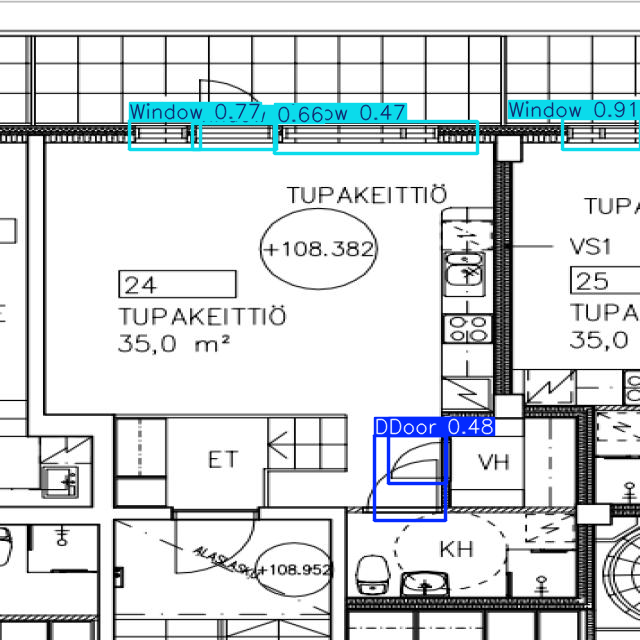

tensor([[562.2684, 118.3710, 640.0000, 149.6312],
        [129.7144, 120.4058, 200.3471, 149.3241],
        [192.0579, 123.4492, 276.5000, 149.1083],
        [388.5972, 435.8704, 446.7909, 483.6744],
        [274.4504, 121.8783, 477.0985, 153.6339],
        [374.4070, 435.9468, 445.9455, 520.0032]], device='cuda:0')
tensor([1., 1., 1., 0., 1., 0.], device='cuda:0')
tensor([0.9115, 0.7719, 0.6590, 0.4775, 0.4729, 0.3782], device='cuda:0')


In [ ]:

results[0].show()  # Visualize in notebook
print(results[0].boxes.xyxy)  # check bounding boxes
print(results[0].boxes.cls)   # class IDs
print(results[0].boxes.conf)  # confidence


In [ ]:
path = model.export(format="onnx")

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel CPUs. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from 'runs/detect/train5/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.53', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 6.2s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.54...
ONNX: export success ✅ 7.8s, saved as 'runs/detect/train5/weights/best.onnx' (11.7 MB)

Export complete (8.2s)
Results saved to /content/runs/detect/train5/weights
Predict:         yolo predict task=detect model=runs/detect/train5/weights/best.onnx imgsz=640  
Validate:        yolo 

In [ ]:
path

'runs/detect/train5/weights/best.onnx'